### 📖Frequency analysis of time series

This chapter introduces the basics of frequency analysis, with applications demonstrated through a sea-level time series dataset. Below is the content outline:

- Example: A sea-level time series
- Fourier analysis
- Example: Composite components
- Fast Fourier Transform (FFT)
- Application to the sea-level time series

Make sure you have installed the necessary libraries (see lesson 2). Now let's start with importing the libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

💡In this lecture, reference is made to the excellent online material by [Jack Schaedler on Digital Signal Processing](https://jackschaedler.github.io/circles-sines-signals/index.html).

### 📖Example: A sea-level time series

The data originates from Palau, measured by the [Sea Level Center at the University of Hawaii](https://uhslc.soest.hawaii.edu/stations/?stn=007#levels). Steps:
- Load the dataset.
- Convert the date-time column.
- Filter the dataset for a specific time period.
- Visualize the time series.


In [4]:
url = "https://git.rwth-aachen.de/nfdi4earth/edutrain/content/extern/fundamentals-of-big-spatial-data/-/raw/main/Data/Lesson6_Palau_sea-level.csv"
sea_level = pd.read_csv(url) # Load the data
sea_level['Datetime[GMT]'] = pd.to_datetime(sea_level['Datetime[GMT]'], dayfirst=True) # Convert the date column to datetime format
sea_level.set_index('Datetime[GMT]', inplace=True) # Set the date column as the index

sea_level = sea_level[sea_level.index > '2018-01-01'] # Filter the data to only include dates after 2018
sea_level

Sea level [mm]
Datetime[GMT]                      
2018-01-01 01:00:00            1506
2018-01-01 02:00:00            1283
2018-01-01 03:00:00            1166
2018-01-01 04:00:00            1207
2018-01-01 05:00:00            1425
...                             ...
2018-12-31 19:00:00            1566
2018-12-31 20:00:00            1496
2018-12-31 21:00:00            1372
2018-12-31 22:00:00            1218
2018-12-31 23:00:00            1062

[8759 rows x 1 columns]

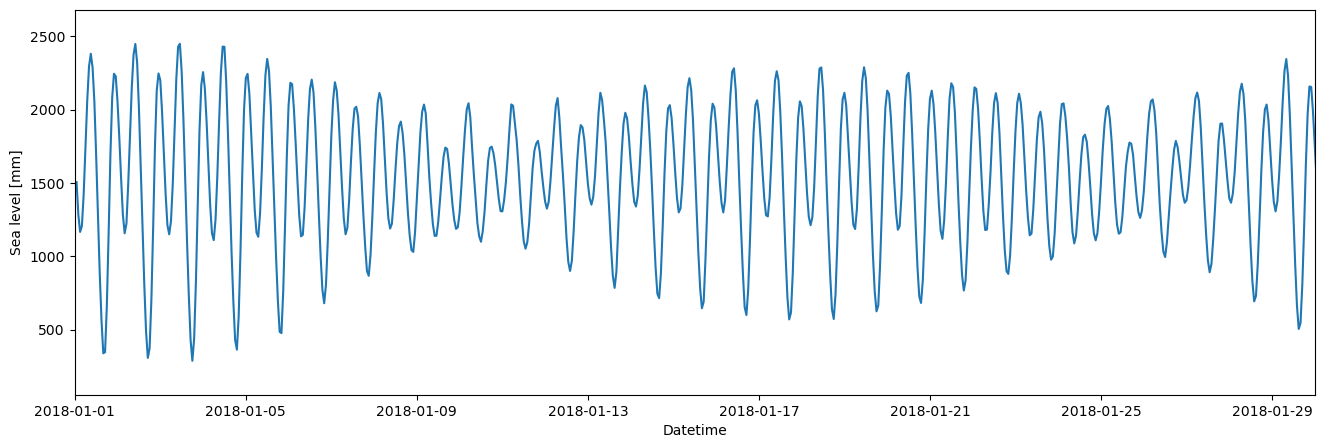

In [5]:
fig, ax = plt.subplots(figsize=(16, 5)) # Create a figure and axis

ax.plot(sea_level.index, sea_level['Sea level [mm]']) # The x axis is the date and the y axis is the sea level
ax.set_xlim(np.datetime64('2018-01-01'), np.datetime64('2018-01-30')) # Set the x-axis limits to only show January 2018
ax.set_xlabel('Datetime') # Set the x-axis label to 'Datetime'
ax.set_ylabel('Sea level [mm]') # Set the y-axis label to 'Sea level [mm]'

plt.show()

Observations:

- Many time series contain cyclic oscillations with varying periods.
- Time series can be decomposed into their components.
- The most widely used method is the Fast Fourier Transform (FFT).


### 📖Fourier analysis

A Fourier series is a mathematical tool that expresses a periodic function (a function that repeats over intervals) as a combination of simpler functions: sine and cosine waves. These sine and cosine waves are "harmonically related," meaning their frequencies are multiples of a base frequency.

The "weighted summation" means that each sine and cosine wave in the series is multiplied by a specific coefficient (weight) that determines how much of that wave contributes to the overall function.

One important property of Fourier series is that they can approximate any function within a given interval as long as the function satisfies certain conditions (e.g., being piecewise continuous).  In this context, the summation (adding the sine and cosine components) creates or synthesizes another function. The idea is that by combining these simple waveforms (sine and cosine), you recreate the shape of the original function.

### 📖Discrete Fourier Transform (DFT)

The DFT can be applied to time series measured at regular intervals and is defined as:

$DFT[k] = \sum_{n = 0}^{N - 1} x[n] \cdot e^{- \phi i} = \sum_{n = 0}^{N - 1} x[n] \cdot (cos(\phi) - sin(\phi)i)$

where:

- $\phi = k \frac{n}{N} 2 \pi$
- $ k $: current frequency, where $ k \in [0, N-1] $
- $ n $: current sample
- $ x[n] $: the sine value at sample $ n $
- $ N $: number of samples

**🧠 Dive Deeper:** what does $i$ represent here?

### 📖Complex numbers

The Fourier transform uses **complex numbers** to combine amplitude and phase information in a compact form. The complex numbers extend the number range so that the equation $x^2 = -1$ becomes solvable:

- $i$ is defined as the square root of -1, known as an imaginary number, $i^2 = -1$.
- Cartesian description: $ z = a + bi $ , where $ a $ is the real part, and $ b $ is the imaginary part.
- Polar description: $ r = e^{i\phi} $ where $ r $ is the radius and $ \phi $ is the angle.
- Euler's formula: $ r = e^{i\phi} = \cos(\phi) + i\sin(\phi) $



<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c6/Komplexe_zahlenebene.svg/260px-Komplexe_zahlenebene.svg.png" alt="alt text" width="1000" align="middle"/> 

*Image source: [Wikipedia](https://de.wikipedia.org/wiki/Komplexe_Zahl)*

Complex numbers are supported in `NumPy`:

In [6]:
compl_number = 3 + 2j # Create a complex number with a real part of 3 and an imaginary part of 2, j is the imaginary unit
compl_number

(3+2j)

In [7]:
np.real(compl_number) # Get the real part of the complex number

3.0

In [8]:
np.imag(compl_number) # Get the imaginary part of the complex number

2.0

In [9]:
np.abs(compl_number) # Get the absolute value of the complex number, wgich is the square root of the sum of the squares of the real and imaginary parts

3.605551275463989

In NumPy, you can calculate the angle of a complex number using `np.angle`. This angle is measured in radians by default, but it can be converted to degrees using `np.degrees`. The angle of $a + bi$ is calculated as:

$arctan(\frac{b}{a})$

In [10]:
print('Angle in radians: {:.2f}'.format(np.angle(compl_number))) 
print('Angle in degrees: {:.2f}°'.format(np.degrees(np.angle(compl_number))))

Angle in radians: 0.59
Angle in degrees: 33.69°


**🧠 Dive Deeper:** To further understand the relationship between angles, sine, and cosine functions, check out this excellent example by [Jack Schaedler](https://jackschaedler.github.io/circles-sines-signals/sincos.html)

### 📖Composite components

In this example, we will create a time series by combining multiple components with different frequencies and amplitudes. This is a common technique in signal processing to simulate complex signals.

We will:
1. Define a linear time vector. A time vector is a sequence of time points.
2. Create three components with varying frequencies and amplitudes.
3. Combine these components into a single composite signal.


In [11]:
# a linear time vector
time = np.linspace(0, 10, 10*96, endpoint=True) # Create a time vector from 0 to 10 days with 10*96 points
time

array([ 0.        ,  0.01042753,  0.02085506,  0.03128259,  0.04171011,
        0.05213764,  0.06256517,  0.0729927 ,  0.08342023,  0.09384776,
        0.10427529,  0.11470282,  0.12513034,  0.13555787,  0.1459854 ,
        0.15641293,  0.16684046,  0.17726799,  0.18769552,  0.19812304,
        0.20855057,  0.2189781 ,  0.22940563,  0.23983316,  0.25026069,
        0.26068822,  0.27111575,  0.28154327,  0.2919708 ,  0.30239833,
        0.31282586,  0.32325339,  0.33368092,  0.34410845,  0.35453597,
        0.3649635 ,  0.37539103,  0.38581856,  0.39624609,  0.40667362,
        0.41710115,  0.42752868,  0.4379562 ,  0.44838373,  0.45881126,
        0.46923879,  0.47966632,  0.49009385,  0.50052138,  0.51094891,
        0.52137643,  0.53180396,  0.54223149,  0.55265902,  0.56308655,
        0.57351408,  0.58394161,  0.59436913,  0.60479666,  0.61522419,
        0.62565172,  0.63607925,  0.64650678,  0.65693431,  0.66736184,
        0.67778936,  0.68821689,  0.69864442,  0.70907195,  0.71

In [13]:
# component 1
freq1 = 1 # Frequency of the first component
amp1 = 1 # Amplitude of the first component
comp1 = amp1 * np.cos(time*2*np.pi*freq1) # Create a cosine wave with the given frequency and amplitude

# component 2
freq2 = 0.5 # Frequency of the second component
amp2 = 3 # Amplitude of the second component
comp2 = amp2 * np.cos(time*2*np.pi*freq2) # Create a cosine wave with the given frequency and amplitude

# component 3
freq3 = 2 # Frequency of the third component
amp3 = 2 # Amplitude of the third component
comp3 = amp3 * np.cos(time*2*np.pi*freq3) # Create a cosine wave with the given frequency and amplitude

# all combined ...
comp_sum = comp1 + comp2 + comp3 # Combine the three components

The general equation of a cosine wave:

$y(t) = A \cdot \cos(2 \pi f t + \phi)$

where:

- $A$: amplitude
- $f$: frequency
- $\phi$: phase
- $t$: time
- $y(t)$: the value of the signal at time $t$

To better visualize the individual components and their combined effect, we can use subplots. This allows us to display the individual components in one plot and their sum in another.

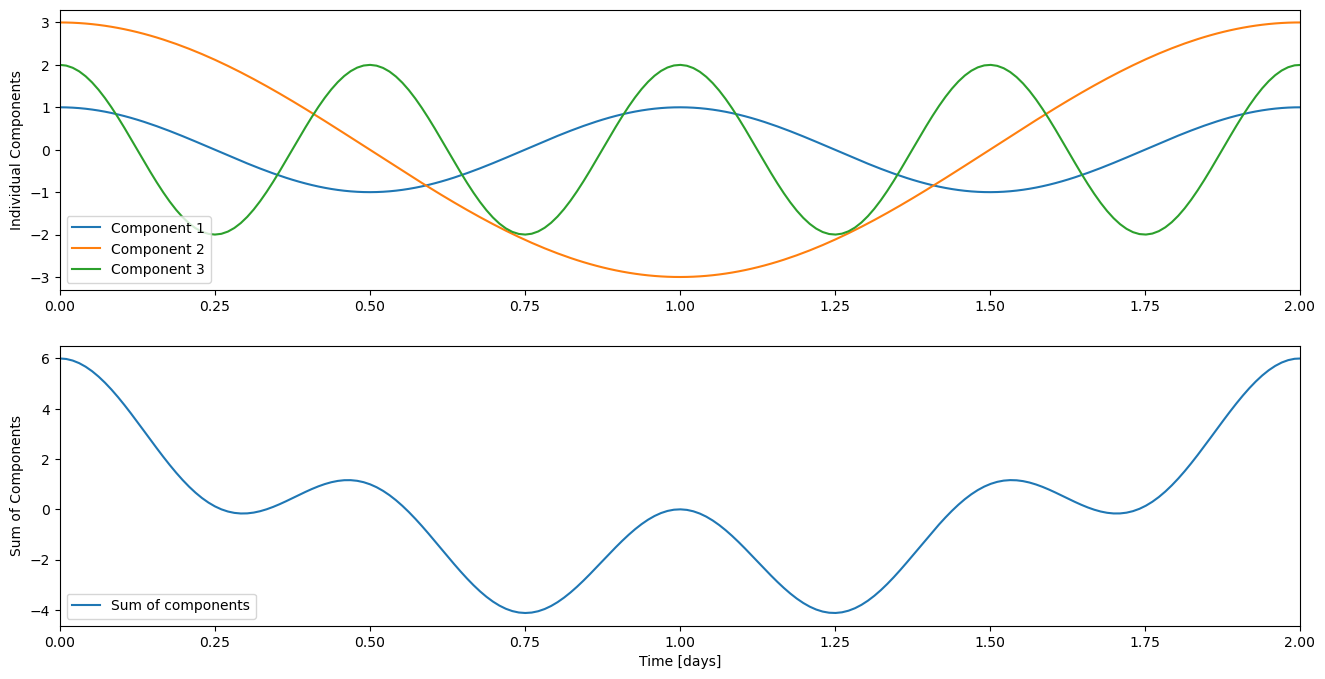

In [14]:
fig, ax = plt.subplots(2, 1, figsize=(16, 8))

# Plot individual components in the first subplot
ax[0].plot(time, comp1, label='Component 1')
ax[0].plot(time, comp2, label='Component 2')
ax[0].plot(time, comp3, label='Component 3')
ax[0].set_xlim(0, 2)
ax[0].set_ylabel('Individual Components')
ax[0].legend()

# Plot the sum of components in the second subplot
ax[1].plot(time, comp_sum, label='Sum of components')
ax[1].set_xlim(0, 2)
ax[1].set_xlabel('Time [days]')
ax[1].set_ylabel('Sum of Components')
ax[1].legend()

plt.show()

💡The DFT allows reversing this summation process, enabling the decomposition of a time series into components of specific frequencies. However, certain considerations must be kept in mind!

### 📖Fast Fourier Transform (FFT)

The Fast Fourier Transform (FFT) is an algorithm to compute the Discrete Fourier Transform (DFT) or its inverse (IDFT). It transforms a signal from its original domain (often time or space) to a frequency domain representation and vice versa.

Key points:
- The FFT decomposes a sequence of values into components of different frequencies.
- It is widely used for signal processing, image analysis, and many other fields.

The FFT algorithm is implemented in Python through the `numpy.fft` module. The function `np.fft.fft` computes the FFT of a signal, while `np.fft.ifft` computes the inverse FFT. The FFT is a complex-valued function, so the result will be a complex array, consisting of both real and imaginary parts, and must be adjusted accordingly.

Below, we will use NumPy's `fft` function to perform an FFT:

In [15]:
# Number of data points
N = len(comp_sum)

# Number of values per frequency unit
T = 96

In [16]:
# calculate the FFT
data_fft = np.fft.fft(comp_sum)

# only use half the data
data_fft = data_fft[0:int(N/2)]
data_fft

array([ 6.00000000e+00+0.00000000e+00j,  6.13976690e+00+2.00924119e-02j,
        6.63155911e+00+4.34040726e-02j,  7.82612588e+00+7.68352797e-02j,
        1.15744336e+01+1.51517636e-01j,  1.44395808e+03+2.36288175e+01j,
       -3.10614353e+00-6.09968246e-02j,  1.09668408e+00+2.51266270e-02j,
        3.21640112e+00+8.42244274e-02j,  6.37634002e+00+1.87853036e-01j,
        4.81568178e+02+1.57649098e+01j, -2.73587407e+00-9.85269577e-02j,
        2.00972898e-01+7.89624667e-03j,  1.47733918e+00+6.28874986e-02j,
        2.42458442e+00+1.11159861e-01j,  3.37490669e+00+1.65798534e-01j,
        4.55807659e+00+2.38878672e-01j,  6.33971707e+00+3.53057793e-01j,
        9.71201605e+00+5.72747558e-01j,  1.94667061e+01+1.21195050e+00j,
        9.57226446e+02+6.27399360e+01j, -2.03696744e+01-1.40205956e+00j,
       -1.00295763e+01-7.23327823e-01j, -6.61275114e+00-4.98666115e-01j,
       -4.90344337e+00-3.85909362e-01j, -3.87511161e+00-3.17741051e-01j,
       -3.18746175e+00-2.71860905e-01j, -2.69493049

NumPy's `fftfreq()` function computes the frequencies corresponding to the FFT result, based on the discrete sampling in the time domain.

💡The unit of the frequency domain is `1/time`, such as Hertz (`1/second`) or cycles per day (`1/day`).


In [17]:
# calculate the frequency spacing
freq = np.fft.fftfreq(N, d=1/T)

# only use half the data
freq = freq[0:int(N/2)]

print(freq, '\n', len(freq))


[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10.  10.1 10.2 10.3 10.4 10.5 10.6 10.7 10.8 10.9 11.  11.1
 11.2 11.3 11.4 11.5 11.6 11.7 11.8 11.9 12.  12.1 12.2 12.3 12.4 12.5
 12.6 12.7 12.8 12.9 13.  13.1 13.2 13.3 13.4 13.5 13.6 13.7 13.8 13.9
 14.  14.1 14.2 14.3 14.4 14.5 14.6 14.7 14.8 14.9 15.  15.1 15.2 15.3
 15.4 15.5 15.6 15.7 15.8 15.9 16.  16.1 16.2 16.3 16.4 16.5 16.6 16.7
 16.8 16.9 17.  17.1 17.2 17.3 17.4 17.5 17.6 17.7 17.8 17.9 18.  18.1
 18.2 18.3 18.4 18.5 18.6 18.7 18.8 18.9 19.  19.1 19.2 19.3 19.4 19.5
 19.6 

In this example:
- `N` is the total number of data points.
- `d=1/T` specifies the sampling interval (e.g., in seconds or days).
- Only the first half of the `freq` array is used since FFT results are symmetric.

### 📖The amplitude spectrum

To calculate the amplitude spectrum, the energy needs to be adjusted. This involves: 

1. Accounting for the half-sided spectrum (factor of 2)
2. Adjusting for the number of data points in the dataset (factor of `N`)


Text(0, 0.5, 'Amplitude [unit]')

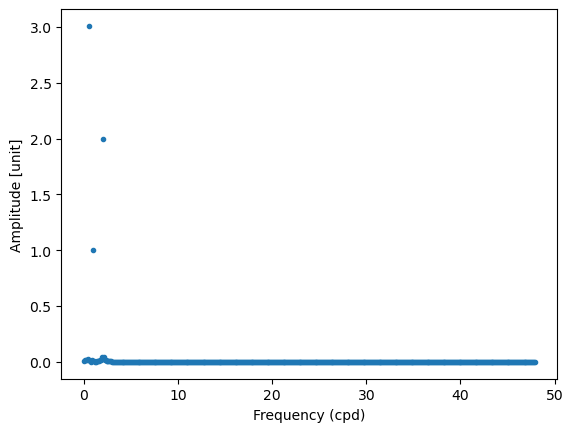

In [18]:
# Calculate the amplitude spectrum
amplitude = (2/N)*np.abs(data_fft) 

plt.plot(freq, amplitude, '.')
plt.xlabel('Frequency (cpd)')
plt.ylabel('Amplitude [unit]')

You can adjust the plot range to focus on specific frequencies.

(0.0, 3.0)

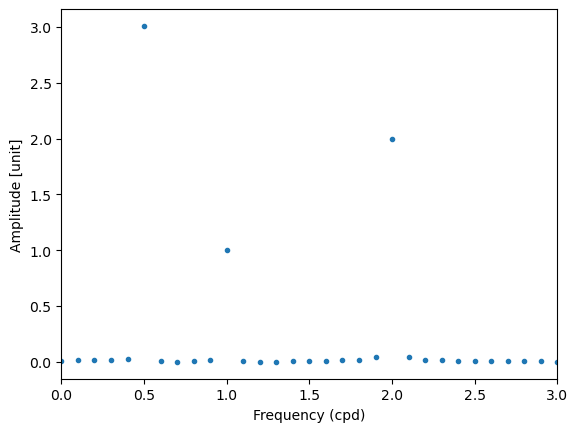

In [19]:
# the amplitude scaled correctly
amplitude = (2/N)*np.abs(data_fft) 

plt.plot(freq, amplitude, '.')
plt.xlabel('Frequency (cpd)')
plt.ylabel('Amplitude [unit]')
plt.xlim(0,3)

- The `np.abs()` function computes the magnitude of the complex FFT result.
- The factor `(2/N)` ensures proper scaling for the half-sided spectrum.
- The frequency range is often adjusted (`plt.xlim`) to focus on significant components.

### 📖Frequency and time domain

The DFT can be understood as a multidimensional object:
- One dimension describes the **time domain**.
- Another dimension describes the **frequency domain**.

<img src="https://git.rwth-aachen.de/nfdi4earth/edutrain/content/extern/fundamentals-of-big-spatial-data/-/raw/main/figures/DFT_v0.py.png?ref_type=heads" alt="alt text" width="500" align="left"/>

Following we apply to the sea level time series dataset.

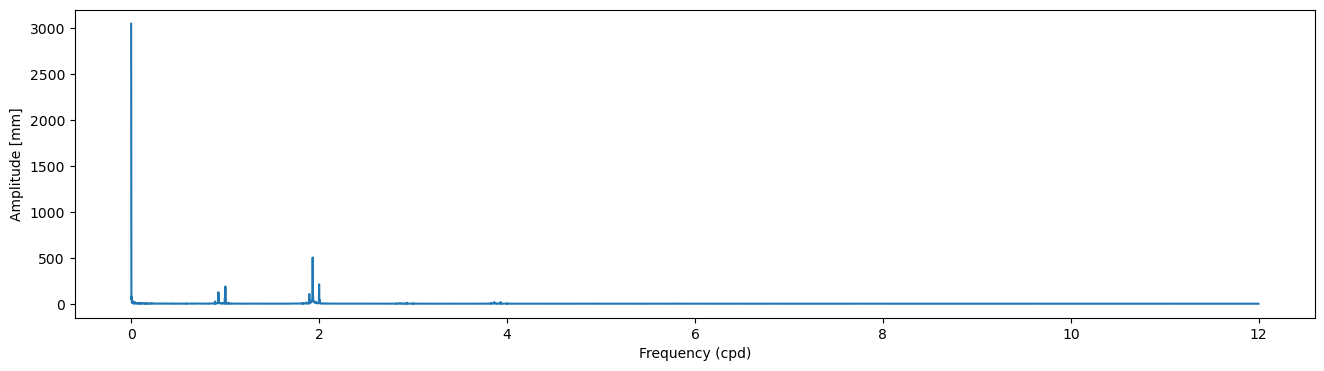

In [20]:
# Parameters for the time series
N = len(sea_level)  # Number of data points
T = 24              # Sampling period (hours)

# Compute the FFT
data_fft = np.fft.fft(sea_level['Sea level [mm]'])
data_fft = data_fft[:int(N/2)]  # Use only positive frequencies

# Compute the corresponding frequencies
freq = np.fft.fftfreq(N, d=1/T)
freq = freq[:int(N/2)]

# Compute the amplitude spectrum
amplitude = (2/N) * np.abs(data_fft)

# Plot the amplitude spectrum
fig, ax = plt.subplots(figsize=(16, 4))
ax.plot(freq, amplitude)
ax.set_xlabel('Frequency (cpd)')
ax.set_ylabel('Amplitude [mm]')
plt.show()

💡The first entry in the FFT represents the mean deviation from zero (DC component).

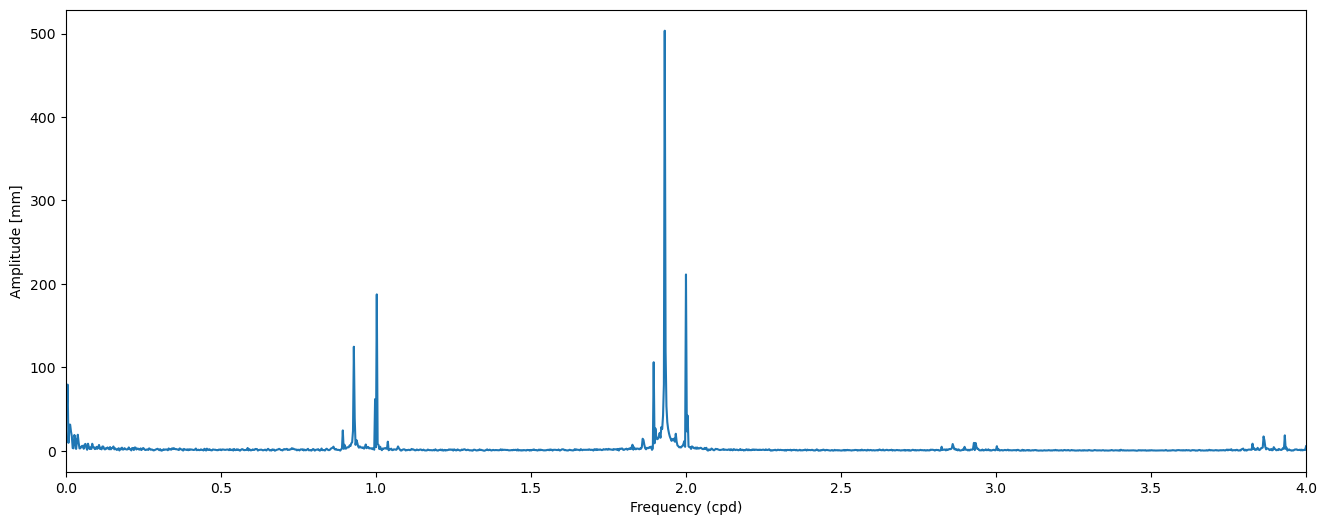

      Frequency   Amplitude
704    1.931727  503.494963
729    2.000228  211.264371
365    1.002854  187.401555
338    0.928873  124.666260
705    1.934467  119.012559
...         ...         ...
4292  11.762987    0.006969
3714  10.179244    0.005686
3946  10.814933    0.005304
3883  10.642311    0.003813
4005  10.976596    0.001969

[4378 rows x 2 columns]


In [21]:
# Plot with adjusted frequency range
fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(freq[1:], amplitude[1:])
ax.set_xlabel('Frequency (cpd)')
ax.set_ylabel('Amplitude [mm]')
ax.set_xlim(0, 4)  # Focus on frequencies between 0 and 4 cycles per day
plt.show()

# Create a DataFrame to sort frequencies by amplitude
result = pd.DataFrame({'Frequency': freq[1:], 'Amplitude': amplitude[1:]})
result.sort_values('Amplitude', ascending=False, inplace=True)

# Display sorted results
print(result)

Explanation:
1. FFT Computation:
   - `np.fft.fft` computes the Fourier Transform of the sea level time series.
   - The result is trimmed to positive frequencies (`data_fft[:int(N/2)]`) since the FFT is symmetric.
2. Frequency Calculation:
   - `np.fft.fftfreq` computes the frequencies associated with the FFT.
3. Amplitude Spectrum:
   - `(2/N) * np.abs(data_fft)` scales the FFT result to compute the amplitude spectrum.
4. Sorting Results:
   - The frequencies are sorted by amplitude to identify the dominant components.

This method allows you to analyze the periodicity of sea level changes in the frequency domain.

### 📖 Summary

- The "peaks" in the amplitude spectrum indicate the strength (amplitude) of the frequency components present in the dataset.
- In this example, the typical components of tidal frequencies are visible.

**🧠 Dive Deeper:** More information about tidal components can be found on [NOAA Tides & Currents](https://tidesandcurrents.noaa.gov/harcon.html?unit=0&timezone=0&id=9410170&name=San+Diego%2C+San+Diego+Bay&state=CA).

### ✏️Task1

Create a dataset with a total duration of 5 days and a sampling frequency of 100 values per day. The dataset consists of two harmonic components, each with an amplitude of 1 and the same frequency of 1 cycle per day.

1. What happens when you add both components together? Visualize the result in a plot.
2. What happens when one of the components is phase-shifted by π? Visualize the result in a plot.

### ✏️Task2

1. Create a dataset consisting of white noise. White noise is equivalent to a Gaussian distribution. The dataset should be 100 days long with a sampling rate of 100 values per day. What does the amplitude spectrum look like?
2. Add two new frequencies, one with 10 cycles per day and another with 3.333 cycles per day. Plot the amplitude spectrum. Are both amplitudes equally high in the spectrum? If not, why not?
